In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle

import matplotlib.pyplot as plt
import numpy as np

In [69]:
def load_experiment_data(experiments):
    for k, v in experiments.items():
        v['dir'] = f"runs/moveto_[0.15, 0.5, 0.85]/{k}/run_1"
        with open(f"{v['dir']}/log.pkl", "rb") as f:
            v["data"] = pickle.load(f)

In [104]:
experiments = {
    "penalty_sqp": {"label": "SQP", "color": "tab:blue"},
    "penalty_sqp_with_restarts": {"label": "SQP w/ Restarts", "color": "tab:cyan"},
    "gradient_descent": {"label": "GD", "color": "tab:orange", "burn_in": 0},
    "gradient_descent_with_restarts": {"label": "GD w/ Restarts", "color": "tab:olive", "burn_in": 0},
    "ula": {"label": "ULA", "color": "tab:green", "burn_in": 50},
    "mala": {"label": "MALA", "color": "tab:red", "burn_in": 50},
    "hmc": {"label": "HMC", "color": "tab:purple", "burn_in": 100},
    "hmc_no_mh": {"label": "HMC No MH", "color": "tab:pink", "burn_in": 100},
    "nmc": {"label": "NMC", "color": "tab:brown"},
    # "nmc_no_mh": {"label": "NMC No MH", "color": "tab:gray"},
}
load_experiment_data(experiments)

labels = [v["label"] for v in experiments.values()]
colors = [v["color"] for v in experiments.values()]

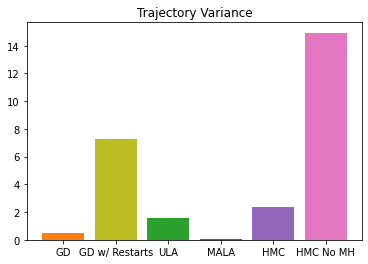

In [108]:
def barplot(algos, vals):
    plt.bar([experiments[a]['label'] for a in algos], vals, color=[experiments[a]['color'] for a in algos])

algos = [
    'gradient_descent', 'gradient_descent_with_restarts', 'ula', 'mala', 'hmc', 'hmc_no_mh',
    #'penalty_sqp', 'penalty_sqp_with_restarts', 'nmc'
]
plt.title("Trajectory Variance")
barplot(algos, [np.var(experiments[a]['data']['iterates'][1:], axis=0).sum() for a in algos])
plt.show()

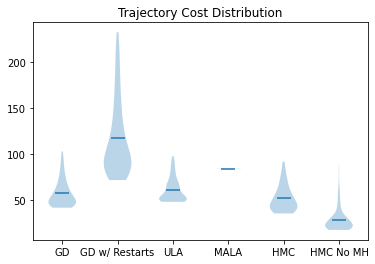

In [117]:
plt.title("Trajectory Cost Distribution")
plt.violinplot([experiments[a]['data']['values'][1:] for a in algos], showmeans=True, showextrema=False)
plt.xticks(range(1, len(algos) + 1), [experiments[a]['label'] for a in algos])
plt.show()

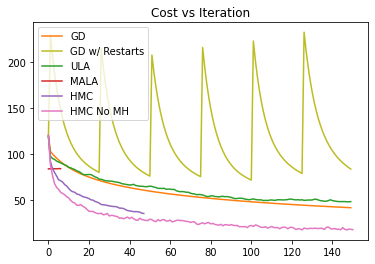

In [118]:
plt.title("Cost vs Iteration")
for algo in algos:
    vals = experiments[algo]['data']['values']
    if algo == "mala":
        vals = vals[1:]
    plt.plot(vals, label=experiments[algo]['label'], color=experiments[algo]['color'])
plt.legend()
plt.show()

In [123]:
experiments["penalty_sqp"]["data"]["plan"].params["panda"].right.shape

(7, 19)